# Feature Engineering 

In this notebook we'll start with a lightly cleaned version of the CSC dataset. We'll go through the following steps:

* Examine and visualize missing data. 
* Determine where it's appropriate to drop records, and the right way to impute missing values for remaining records. 
* Bin some of our numeric features. 
* Condense our offence descriptions. 
* Find groupings of features to try in our modelling. 
* Reshape dataframe so that each record represents one offender. 

Let's start by importing our packages and reading in the data.

In [2]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer

In [10]:
#Read in data 
df = pd.read_csv('cleaned_data.csv', index_col=0)

#Ensure all info is displayed in notebook
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,FISCAL YEAR,SENTENCE ID,OFFENDER NUMBER,RACE,RACE GROUPING,GENDER,AGE,IN CUSTODY/COMMUNITY,SUPERVISION TYPE,JURISDICTION,SENTENCE TYPE,AGGREGATE SENTENCE LENGTH,INSTITUTIONAL SECURITY LEVEL,PROVINCE,LOCATION TYPE,OFFENDER SECURITY LEVEL,DYNAMIC/NEED,STATIC/RISK,REINTEGRATION POTENTIAL,MOTIVATION,RELIGION,WARRANT ID,COURT,OFFENCE ID,OFFENCE DESCRIPTION,RACIAL CATEGORY,SENTENCE LENGTH (YEARS)
0,11-12,U40A00014615,82.50710,White,Non Indigenous,MALE,23,In Custody,NaN,FEDERAL,DETERMINATE,1096.0,MINIMUM,ONTARIO,FEDERAL INSTITU,MINIMUM,MEDIUM,LOW,HIGH,HIGH,CHRI NON SPEC,U40A00081680,ONT COURT OF JUSTICE,U40A00073751,POSS PROH/RESTR F/ARM W/AMMUN,White,3.00
1,11-12,U40A00014615,82.50710,White,Non Indigenous,MALE,23,In Custody,NaN,FEDERAL,DETERMINATE,1096.0,MINIMUM,ONTARIO,FEDERAL INSTITU,MINIMUM,MEDIUM,LOW,HIGH,HIGH,CHRI NON SPEC,U40A00081680,ONT COURT OF JUSTICE,U40A00073752,FAIL TO COMPLY W/ PROBATION ORDER,White,3.00
2,11-12,U40A00014615,82.50710,White,Non Indigenous,MALE,23,In Custody,NaN,FEDERAL,DETERMINATE,1096.0,MINIMUM,ONTARIO,FEDERAL INSTITU,MINIMUM,MEDIUM,LOW,HIGH,HIGH,CHRI NON SPEC,U40A00081680,ONT COURT OF JUSTICE,U40A00073753,POSS SCHEDULE I/II SUBST FOR PURP TRAFF,White,3.00
3,11-12,U80A00008369,104.76347,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00048789,VANCOUVER PROVINCIAL COURT,U80A00029774,ASSAULT - USE OF FORCE,White,2.01
4,11-12,U80A00008369,104.76347,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00048789,VANCOUVER PROVINCIAL COURT,U80A00029785,ROBBERY - ALL OTHERS,White,2.01


Let's get a summary of our null values, and then visualize it using the `missingno` package.

In [8]:
df.isnull().sum()

FISCAL YEAR                          0
SENTENCE ID                          0
OFFENDER NUMBER                      0
RACE                                 0
RACE GROUPING                        0
GENDER                               0
AGE                                  0
IN CUSTODY/COMMUNITY                 0
SUPERVISION TYPE                467091
JURISDICTION                         0
SENTENCE TYPE                        0
AGGREGATE SENTENCE LENGTH            0
INSTITUTIONAL SECURITY LEVEL    233677
PROVINCE                             0
LOCATION TYPE                        0
OFFENDER SECURITY LEVEL          44539
DYNAMIC/NEED                     18744
STATIC/RISK                      18526
REINTEGRATION POTENTIAL          19278
MOTIVATION                       19600
RELIGION                         42563
WARRANT ID                           0
COURT                            10772
OFFENCE ID                           0
OFFENCE DESCRIPTION                  0
RACIAL CATEGORY          

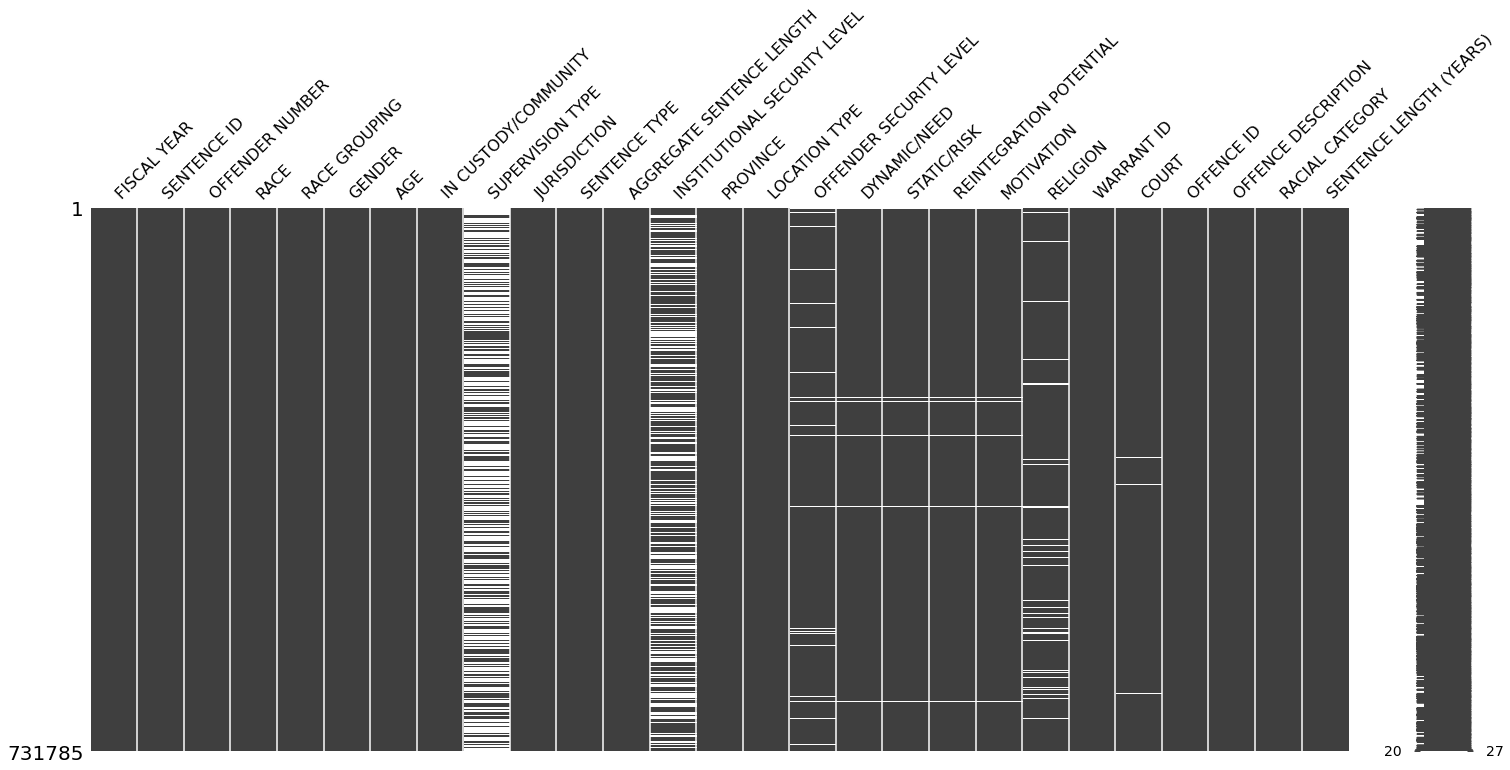

In [7]:
msno.matrix(df)
plt.show()